# Part 0: Import Statements

In [68]:
# import stats + sklearn classifiers + regressors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

#!pip3 install pydot
import pydot
from sklearn import *

# Part 1: Read and parse data

In [2]:
# read in data and get the size of the data set
X = pd.read_csv('drug_properties_final.csv', header=0, usecols=range(1,16))
print(X.head(5))
nsamples, nfts = X.shape
print(nsamples)
print(nfts)

     0    1    2      3    4           5    6    7     8    9     10  \
0  1.0  0.0  0.0  734.0  1.0  344.089603  7.0  3.0  25.0  0.0  344.3   
1  1.0  0.0  0.0  633.0  1.0  354.183109  4.0  1.0  26.0  0.0  354.4   
2  1.0  0.0  0.0  497.0  1.0  292.121178  3.0  1.0  22.0  0.0  292.3   
3  0.0  0.0  0.0  780.0  1.0  518.194068  8.0  6.0  38.0  0.0  518.6   
4  2.0  0.0  0.0  415.0  1.0  301.179027  3.0  3.0  22.0  0.0  301.4   

           11   12     13   14  
0  344.089603  2.0  121.0  2.1  
1  354.183109  8.0   71.4  4.4  
2  292.121178  1.0   52.9  2.4  
3  518.194068  5.0  156.0  6.9  
4  301.179027  2.0   68.4  2.3  
1784
15


In [3]:
# get the names of the drugs we are looking at
drugs = pd.read_csv('drug_name_list_final.csv', header=0, usecols=range(1,2))
#drugs

In [4]:
# there are more drugs that have max response and auc data since not all drugs were 
# accessible in pubchem- so load that bigger set of drugs
drugs_with_resp_auc_data = pd.read_csv('drugs.csv', usecols = range(1,2))
#drugs_with_resp_auc_data

In [5]:
# get the proper indexes from the set of all drugs to map to the pubchem drugs 
indexes = []
counter = 0
for drug in drugs_with_resp_auc_data.iloc[:,0]:
    if drug in list(drugs.iloc[:,0]):
        indexes.append(counter)
    counter = counter + 1

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 19

In [6]:
# get values for auc
auc_values = pd.read_csv('auc.csv')
auc_values = auc_values.iloc[:,1:7]
print(auc_values.head(5))

# get values for max resp
maxresp_values = pd.read_csv('max_resp.csv')
maxresp_values = maxresp_values.iloc[:,1:7]
print(maxresp_values.head(5))

         0        1        2        3        4        5
0  428.792  460.119  277.164  443.183  408.479  408.348
1  466.491  494.689  477.969  580.252  445.541  490.083
2  413.997  261.922  438.649  360.282  417.510  322.348
3  473.658  514.225  391.226  472.357  455.033  483.530
4  499.085  454.862  284.317  498.955  490.830  436.067
         0        1       2        3       4        5
0   31.627   50.723  39.010   62.477  53.749   73.943
1  104.528  106.693  94.311  120.259  79.373  105.277
2   94.854   15.955  91.379   82.129  87.158   66.432
3   63.828   74.488  49.955  101.986  88.269   92.542
4    5.796    8.253  14.334   89.583  72.228   47.565


In [7]:
# get the re-indexed set of drugs, auc values, and max resp
final_drugs = drugs_with_resp_auc_data.iloc[indexes,0]
final_drugs

final_auc = auc_values.iloc[indexes,:]
print(final_auc)

final_maxresp = maxresp_values.iloc[indexes,:]
print(final_maxresp)

            0        1        2        3        4        5
1     466.491  494.689  477.969  580.252  445.541  490.083
2     413.997  261.922  438.649  360.282  417.510  322.348
3     473.658  514.225  391.226  472.357  455.033  483.530
4     499.085  454.862  284.317  498.955  490.830  436.067
5     439.192  464.651  441.677  496.490  482.966  438.622
6     444.042  507.567  487.697  473.677  337.470  371.668
7     453.739  466.528  386.022  412.972  410.137  422.828
8     248.701  322.929  362.261  299.505  290.917  273.682
9     468.376  456.636  207.428  425.188  439.731  444.202
10    479.920  458.372  234.410  453.171  445.012  474.465
11    508.541  501.774  476.485  556.192  478.471  528.478
12    460.677  481.198  486.335  474.319  432.789  458.532
13    558.791  529.796  526.594  572.759  547.693  529.938
15    480.426  496.298  475.607  581.248  548.532  409.708
18    285.296  321.411  320.884  356.004  298.973  286.425
19    471.813  514.940  478.022  561.303  495.328  498.6

In [8]:
# fix inf, nan values, and values exceeding the max
X[X==np.inf]=np.nan
np.where(X.values >= np.finfo(np.float32).max)
X = np.nan_to_num(X)

In [10]:
# check data to make sure we got rid of inf, nan, and max values
print(sum(np.isnan(X)))
print(sum(X > 10000))
print(sum(np.isinf(X)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# and remove the nans in the auc data frame
final_auc = np.nan_to_num(final_auc)
print(sum(np.isnan(final_auc)))

[0 0 0 0 0 0]


In [12]:
# and remove the nans in the max resp data frame
final_maxresp = np.nan_to_num(final_maxresp)
print(sum(np.isnan(final_maxresp)))

[0 0 0 0 0 0]


# Part 2: REGRESSION

In [13]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_ft_auc, test_ft_auc, train_lab_auc, test_lab_auc = train_test_split(X, final_auc, test_size = 0.3, random_state = 0)
train_ft_resp, test_ft_resp, train_lab_resp, test_lab_resp = train_test_split(X, final_maxresp, test_size = 0.3, random_state = 0)

In [75]:
# compute metrics
def compute_regression_metrics(y_true_labels, y_pred_labels): 
    r2 = sklearn.metrics.r2_score(y_true_labels, y_pred_labels)
    mae = sklearn.metrics.mean_absolute_error(y_true_labels, y_pred_labels)
    mse = sklearn.metrics.mean_squared_error(y_true_labels, y_pred_labels)
    expl_var = sklearn.metrics.explained_variance_score(y_true_labels, y_pred_labels)

    print("R2: ", r2)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("Explained Variance: ", expl_var)
    return([r2, mae, mse, expl_var])

## Part 2A: Random Forest Regressor

In [76]:
clf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_auc, train_lab_auc)  
y_pred=clf.predict(test_ft_auc)
print("Prediction metrics")
reg_rfc_auc = compute_regression_metrics(test_lab_auc, y_pred)

Prediction metrics
R2:  0.010864869403462854
MAE:  0.43842299724097766
MSE:  0.23486023317955482
Explained Variance:  0.014620326587056642


In [16]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fts = pd.read_csv('val_names.csv')
fts = fts.iloc[:,1]
print(fts)

0         atom_stereo_count
1         bond_stereo_count
2                    charge
3                complexity
4       covalent_unit_count
5                exact_mass
6     h_bond_acceptor_count
7        h_bond_donor_count
8          heavy_atom_count
9        isotope_atom_count
10         molecular_weight
11        monoisotopic_mass
12       rotable_bond_count
13                     tpsa
14                    xlogp
Name: 0, dtype: object


In [17]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(fts)):
    print("%d. %s has feature importance %f" % (f + 1, fts[indices[f]], importances[indices[f]]))

Feature ranking:
1. xlogp has feature importance 0.144730
2. tpsa has feature importance 0.142684
3. complexity has feature importance 0.137753
4. heavy_atom_count has feature importance 0.097710
5. rotable_bond_count has feature importance 0.086249
6. h_bond_acceptor_count has feature importance 0.069109
7. atom_stereo_count has feature importance 0.066527
8. h_bond_donor_count has feature importance 0.055502
9. molecular_weight has feature importance 0.055354
10. monoisotopic_mass has feature importance 0.054304
11. exact_mass has feature importance 0.052904
12. bond_stereo_count has feature importance 0.031017
13. covalent_unit_count has feature importance 0.006159
14. isotope_atom_count has feature importance 0.000000
15. charge has feature importance 0.000000


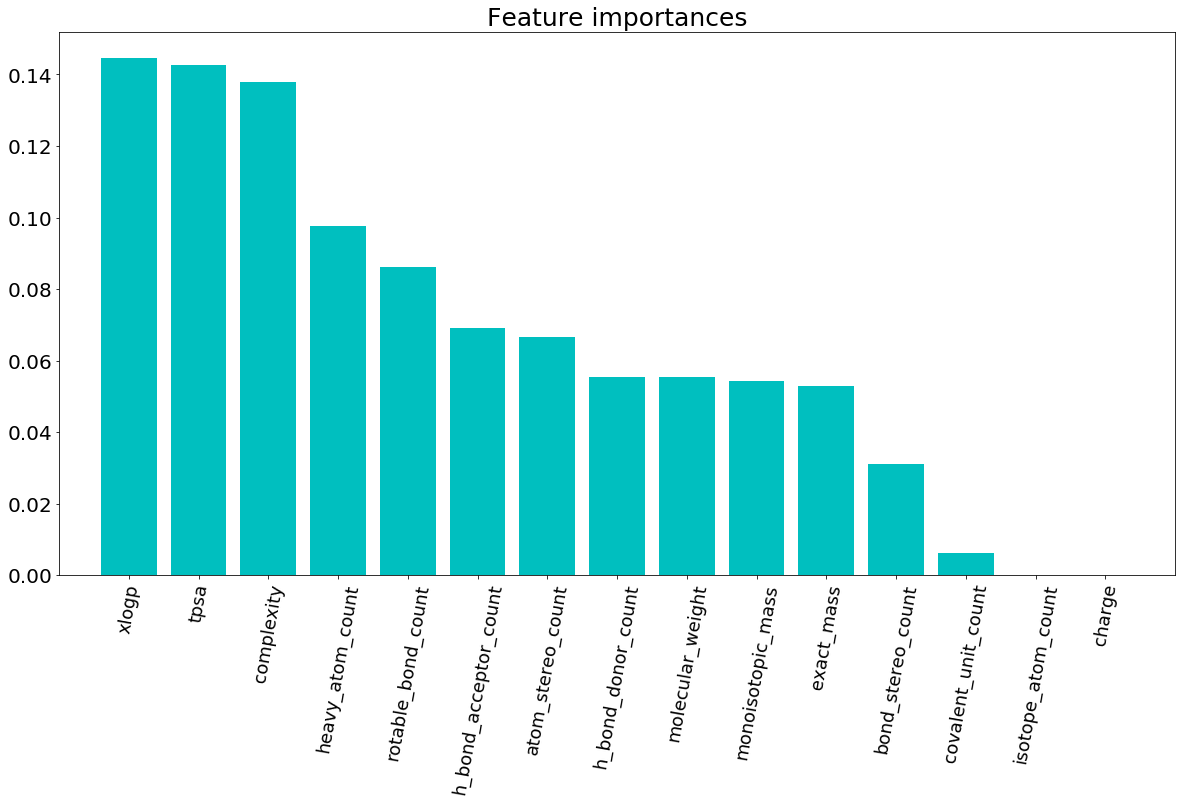

In [18]:
# Plot the feature importances of the forest
shape = len(fts)
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()

In [20]:
tree.export_graphviz(clf.estimators_[0], out_file='Tree1.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree1.dot')
graph.write_png('tree1.png')

tree.export_graphviz(clf.estimators_[1], out_file='Tree2.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree2.dot')
graph.write_png('tree2.png')

tree.export_graphviz(clf.estimators_[2], out_file='Tree3.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree3.dot')
graph.write_png('tree3.png')

tree.export_graphviz(clf.estimators_[3], out_file='Tree4.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree4.dot')
graph.write_png('tree4.png')

In [77]:
# do random forest with the max resp data now
clf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_resp, train_lab_resp)  
y_pred=clf.predict(test_ft_resp)
print("Prediction metrics")
reg_rfc_resp = compute_regression_metrics(test_lab_resp, y_pred)

Prediction metrics
R2:  0.07588053066745258
MAE:  0.4331123474887464
MSE:  0.22718968139237908
Explained Variance:  0.07904085695032875


In [22]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [23]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(fts)):
    print("%d. %s has feature importance %f" % (f + 1, fts[indices[f]], importances[indices[f]]))

Feature ranking:
1. xlogp has feature importance 0.139899
2. tpsa has feature importance 0.136622
3. complexity has feature importance 0.134437
4. heavy_atom_count has feature importance 0.114687
5. rotable_bond_count has feature importance 0.084878
6. h_bond_acceptor_count has feature importance 0.069369
7. atom_stereo_count has feature importance 0.063658
8. h_bond_donor_count has feature importance 0.060713
9. molecular_weight has feature importance 0.055442
10. monoisotopic_mass has feature importance 0.055356
11. exact_mass has feature importance 0.054330
12. bond_stereo_count has feature importance 0.022447
13. covalent_unit_count has feature importance 0.008161
14. isotope_atom_count has feature importance 0.000000
15. charge has feature importance 0.000000


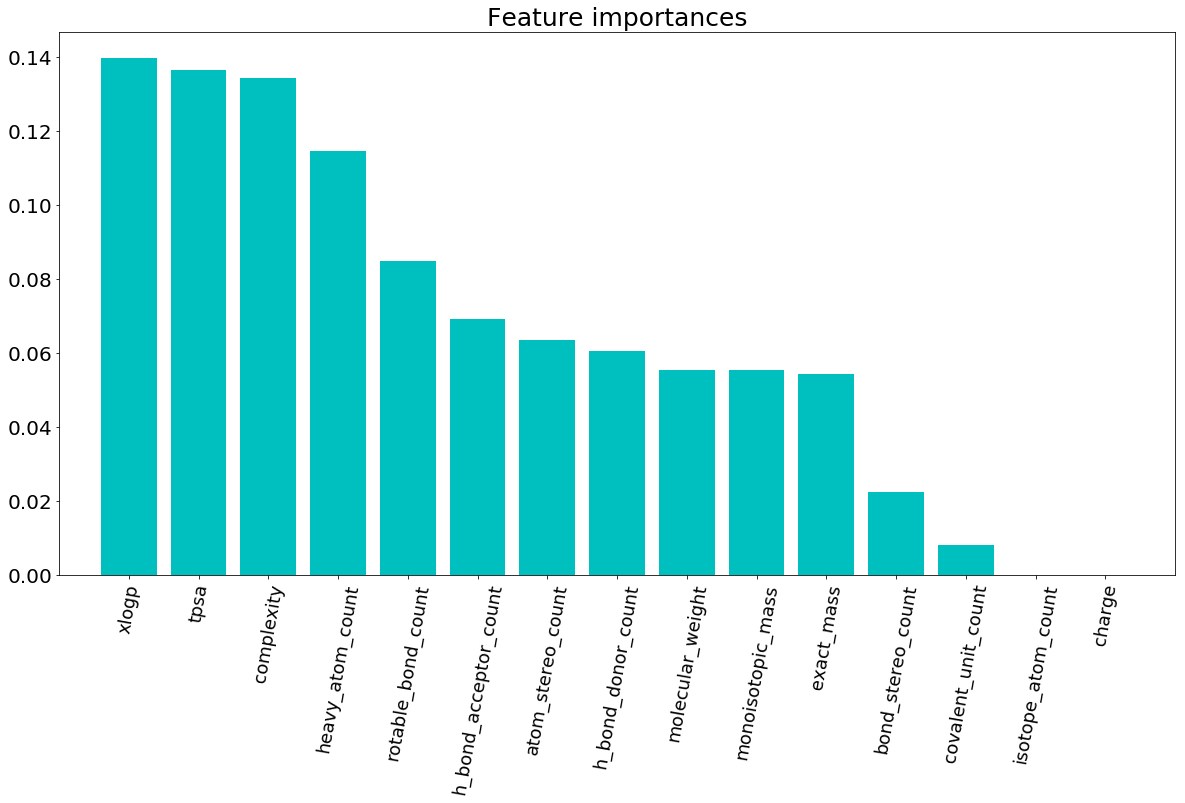

In [24]:
# Plot the feature importances of the forest
shape = len(fts)
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()

In [25]:
tree.export_graphviz(clf.estimators_[0], out_file='Tree5.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree5.dot')
graph.write_png('tree5.png')

tree.export_graphviz(clf.estimators_[1], out_file='Tree6.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree6.dot')
graph.write_png('tree6.png')

tree.export_graphviz(clf.estimators_[2], out_file='Tree7.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree7.dot')
graph.write_png('tree7.png')

tree.export_graphviz(clf.estimators_[3], out_file='Tree8.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree8.dot')
graph.write_png('tree8.png')

## Part 2B: KNN Regressor

In [78]:
knn = KNeighborsRegressor(algorithm = 'ball_tree')
knn.fit(train_ft_auc, train_lab_auc) 
y_pred = knn.predict(test_ft_auc)
print("Prediction metrics")
reg_knn_auc = compute_regression_metrics(test_lab_auc, y_pred)

Prediction metrics
R2:  -0.16892681800895878
MAE:  0.455223880597015
MSE:  0.27726368159203946
Explained Variance:  -0.16705679340699164


In [79]:
knn = KNeighborsRegressor(algorithm = 'ball_tree')
knn.fit(train_ft_resp, train_lab_resp) 
y_pred = knn.predict(test_ft_resp)
print("Prediction metrics")
reg_knn_resp = compute_regression_metrics(test_lab_resp, y_pred)

Prediction metrics
R2:  -0.12049142783638045
MAE:  0.456778606965174
MSE:  0.2752611940298504
Explained Variance:  -0.11910279031264655


## Plot the regression metrics in bar graph

[[ 0.01086487  0.438423    0.23486023  0.01462033]
 [ 0.07588053  0.43311235  0.22718968  0.07904086]
 [-0.16892682  0.45522388  0.27726368 -0.16705679]
 [-0.12049143  0.45677861  0.27526119 -0.11910279]]


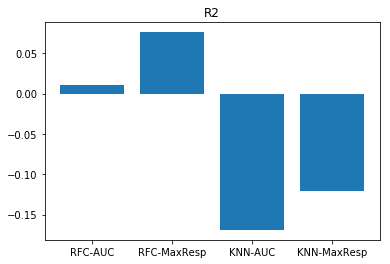

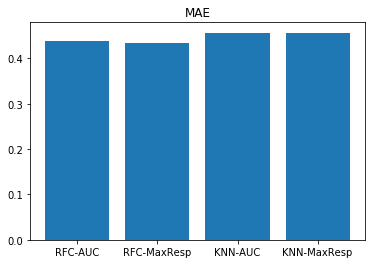

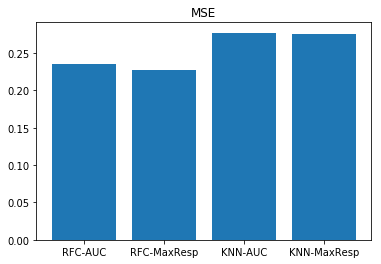

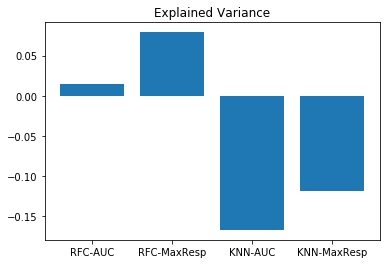

In [98]:
reg_metrics = np.zeros((4,4))
reg_metrics[0,:] = reg_rfc_auc
reg_metrics[1,:] = reg_rfc_resp
reg_metrics[2,:] = reg_knn_auc
reg_metrics[3,:] = reg_knn_resp

print(reg_metrics)

bars = ('RFC-AUC', 'RFC-MaxResp', 'KNN-AUC', 'KNN-MaxResp',)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, reg_metrics[:,0])
plt.xticks(y_pos, bars)
plt.title('R2')
plt.savefig('static/images/regression_r2.png')
plt.show()

plt.bar(y_pos, reg_metrics[:,1])
plt.xticks(y_pos, bars)
plt.title('MAE')
plt.savefig('static/images/regression_mae.png')
plt.show()

plt.bar(y_pos, reg_metrics[:,2])
plt.xticks(y_pos, bars)
plt.title('MSE')
plt.savefig('static/images/regression_mse.png')
plt.show()

plt.bar(y_pos, reg_metrics[:,3])
plt.xticks(y_pos, bars)
plt.title('Explained Variance')
plt.savefig('static/images/regression_expl_var.png')
plt.show()

# Part 3: CLASSIFICATION

In [31]:
# make values into categorical data for 2 classes
auc_median = np.median(final_auc)
auc_classes = final_auc > auc_median
auc_classes = auc_classes.astype(int)

resp_median = np.median(final_maxresp)
resp_classes = final_maxresp > resp_median
resp_classes = resp_classes.astype(int)


In [32]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_ft_auc, test_ft_auc, train_lab_auc, test_lab_auc = train_test_split(X, auc_classes, test_size = 0.3, random_state = 0)
train_ft_resp, test_ft_resp, train_lab_resp, test_lab_resp = train_test_split(X, resp_classes, test_size = 0.3, random_state = 0)


In [106]:
# compute metrics
def compute_classification_metrics(y_true_labels, y_pred_labels): 
    average_precision = sklearn.metrics.average_precision_score(y_true_labels, y_pred_labels)
    auc = sklearn.metrics.roc_auc_score(y_true_labels, y_pred_labels)
    acc = sklearn.metrics.accuracy_score(y_true_labels, y_pred_labels)
    f1 = sklearn.metrics.f1_score(y_true_labels, y_pred_labels, average='weighted')

    print("Avg Precision: ", average_precision)
    print("AUROC: ", auc)
    print("Accuracy: ", acc)
    print("F1: ", f1)
    return([average_precision, auc, acc, f1])

## Part 3A: Random Forest Classifier

In [107]:
clf = RandomForestClassifier(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_auc, train_lab_auc)  
y_pred=clf.predict(test_ft_auc)
print("Prediction metrics")
class_rfc_auc = compute_classification_metrics(test_lab_auc, y_pred)

Prediction metrics
Avg Precision:  0.5256387745619518
AUROC:  0.5710517684707955
Accuracy:  0.11194029850746269
F1:  0.5990881602336381


In [37]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fts = pd.read_csv('val_names.csv')
fts = fts.iloc[:,1]
print(fts)

0         atom_stereo_count
1         bond_stereo_count
2                    charge
3                complexity
4       covalent_unit_count
5                exact_mass
6     h_bond_acceptor_count
7        h_bond_donor_count
8          heavy_atom_count
9        isotope_atom_count
10         molecular_weight
11        monoisotopic_mass
12       rotable_bond_count
13                     tpsa
14                    xlogp
Name: 0, dtype: object


In [38]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(fts)):
    print("%d. %s has feature importance %f" % (f + 1, fts[indices[f]], importances[indices[f]]))

Feature ranking:
1. tpsa has feature importance 0.118765
2. complexity has feature importance 0.116465
3. xlogp has feature importance 0.107701
4. exact_mass has feature importance 0.100753
5. monoisotopic_mass has feature importance 0.099458
6. molecular_weight has feature importance 0.098623
7. heavy_atom_count has feature importance 0.078083
8. rotable_bond_count has feature importance 0.076317
9. h_bond_acceptor_count has feature importance 0.065338
10. h_bond_donor_count has feature importance 0.057629
11. atom_stereo_count has feature importance 0.054138
12. bond_stereo_count has feature importance 0.015235
13. covalent_unit_count has feature importance 0.011493
14. isotope_atom_count has feature importance 0.000000
15. charge has feature importance 0.000000


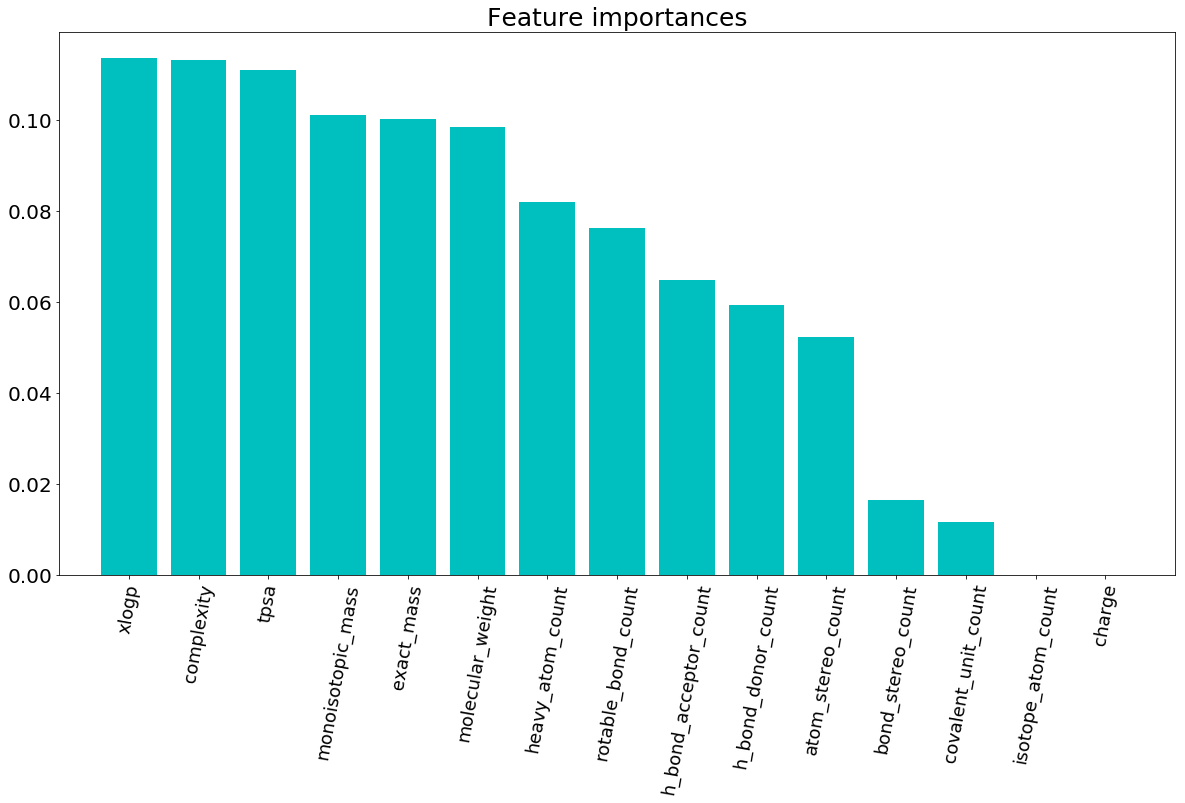

<Figure size 432x288 with 0 Axes>

In [115]:
# Plot the feature importances of the forest
shape = len(fts)
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()
plt.savefig('static/images/rfc_auc_ft_importances.png')

In [108]:
clf = RandomForestClassifier(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_resp, train_lab_resp)  
y_pred=clf.predict(test_ft_resp)
print("Prediction metrics")
class_rfc_resp = compute_classification_metrics(test_lab_resp, y_pred)

Prediction metrics
Avg Precision:  0.5567150089141631
AUROC:  0.618068492836699
Accuracy:  0.18097014925373134
F1:  0.6161452142187595


In [41]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fts = pd.read_csv('val_names.csv')
fts = fts.iloc[:,1]
print(fts)

0         atom_stereo_count
1         bond_stereo_count
2                    charge
3                complexity
4       covalent_unit_count
5                exact_mass
6     h_bond_acceptor_count
7        h_bond_donor_count
8          heavy_atom_count
9        isotope_atom_count
10         molecular_weight
11        monoisotopic_mass
12       rotable_bond_count
13                     tpsa
14                    xlogp
Name: 0, dtype: object


In [42]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(fts)):
    print("%d. %s has feature importance %f" % (f + 1, fts[indices[f]], importances[indices[f]]))

Feature ranking:
1. xlogp has feature importance 0.113662
2. complexity has feature importance 0.113060
3. tpsa has feature importance 0.110917
4. monoisotopic_mass has feature importance 0.101024
5. exact_mass has feature importance 0.100109
6. molecular_weight has feature importance 0.098337
7. heavy_atom_count has feature importance 0.081854
8. rotable_bond_count has feature importance 0.076203
9. h_bond_acceptor_count has feature importance 0.064927
10. h_bond_donor_count has feature importance 0.059383
11. atom_stereo_count has feature importance 0.052314
12. bond_stereo_count has feature importance 0.016445
13. covalent_unit_count has feature importance 0.011764
14. isotope_atom_count has feature importance 0.000000
15. charge has feature importance 0.000000


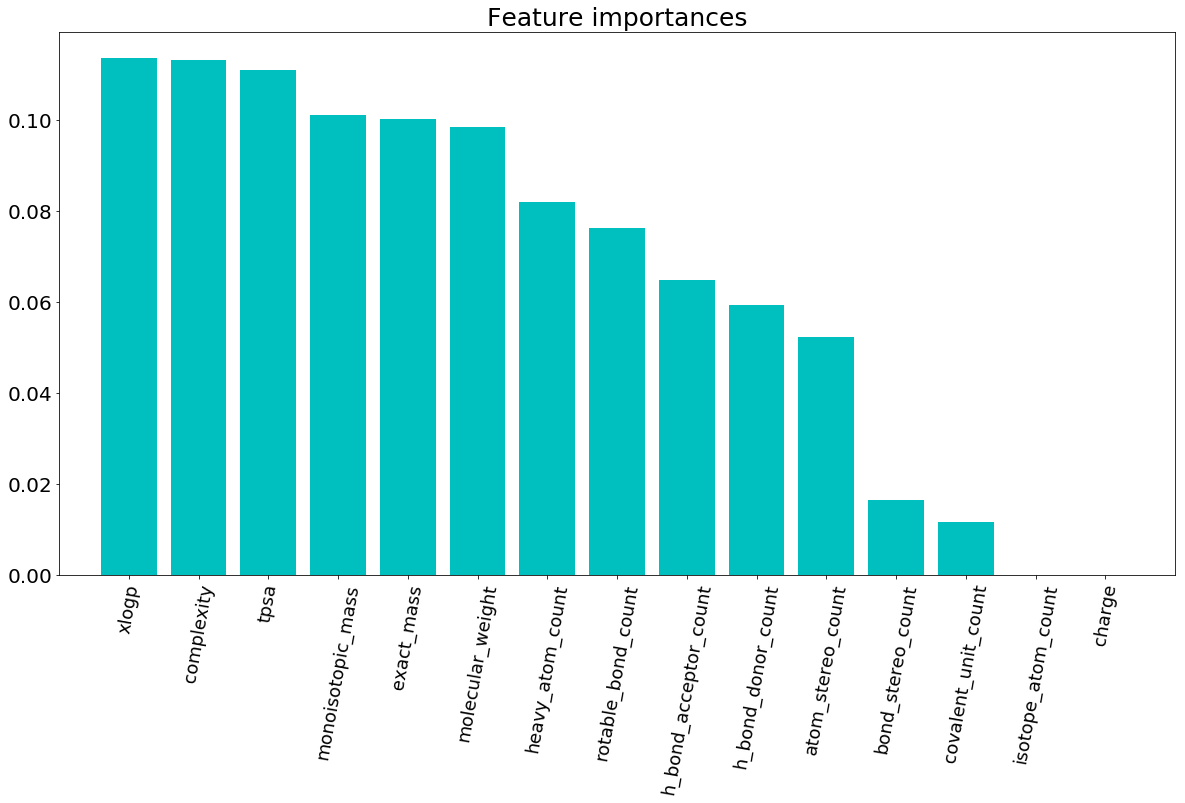

In [43]:
# Plot the feature importances of the forest
shape = len(fts)
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()

## Part 3B: KNN Classifier


In [109]:
knn = KNeighborsClassifier(algorithm = 'ball_tree')
knn.fit(train_ft_auc, train_lab_auc) 
y_pred = knn.predict(test_ft_auc)
print("Prediction metrics")
class_knn_auc = compute_classification_metrics(test_lab_auc, y_pred)

Prediction metrics
Avg Precision:  0.5028454545302861
AUROC:  0.5329907657136411
Accuracy:  0.11194029850746269
F1:  0.5523058538449409


In [110]:
knn = KNeighborsClassifier(algorithm = 'ball_tree')
knn.fit(train_ft_resp, train_lab_resp) 
y_pred = knn.predict(test_ft_resp)
print("Prediction metrics")
class_knn_resp = compute_classification_metrics(test_lab_resp, y_pred)

Prediction metrics
Avg Precision:  0.5112368102392871
AUROC:  0.5554159557868109
Accuracy:  0.12126865671641791
F1:  0.5408236756149554


[[0.52563877 0.57105177 0.1119403  0.59908816]
 [0.55671501 0.61806849 0.18097015 0.61614521]
 [0.50284545 0.53299077 0.1119403  0.55230585]
 [0.51123681 0.55541596 0.12126866 0.54082368]]


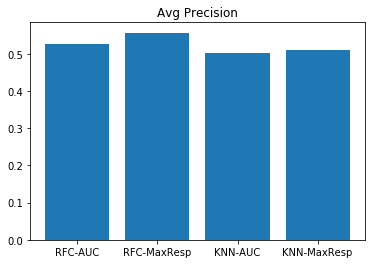

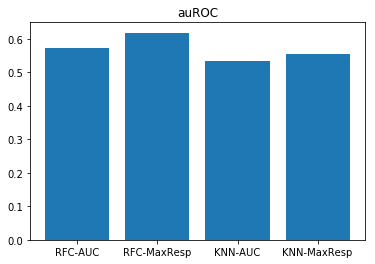

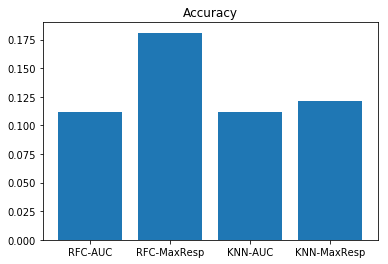

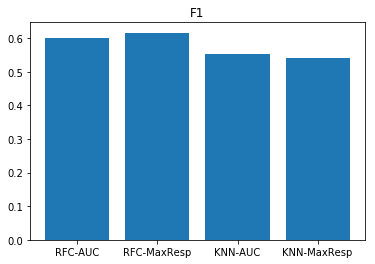

In [111]:
class_metrics = np.zeros((4,4))
class_metrics[0,:] = class_rfc_auc
class_metrics[1,:] = class_rfc_resp
class_metrics[2,:] = class_knn_auc
class_metrics[3,:] = class_knn_resp

print(class_metrics)

bars = ('RFC-AUC', 'RFC-MaxResp', 'KNN-AUC', 'KNN-MaxResp',)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, class_metrics[:,0])
plt.xticks(y_pos, bars)
plt.title('Avg Precision')
plt.savefig('static/images/classification_precision.png')
plt.show()

plt.bar(y_pos, class_metrics[:,1])
plt.xticks(y_pos, bars)
plt.title('auROC')
plt.savefig('static/images/classification_auroc.png')
plt.show()

plt.bar(y_pos, class_metrics[:,2])
plt.xticks(y_pos, bars)
plt.title('Accuracy')
plt.savefig('static/images/classification_accuracy.png')
plt.show()

plt.bar(y_pos, class_metrics[:,3])
plt.xticks(y_pos, bars)
plt.title('F1')
plt.savefig('static/images/classification_f1.png')
plt.show()

# Part 4: Basic Data Exploration

Text(0, 0.5, 'Max Resp')

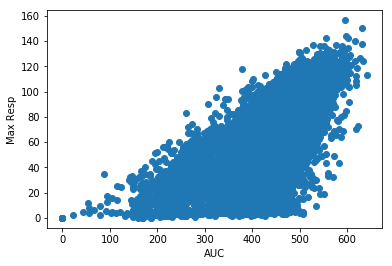

In [48]:
# plot correlation between auc and max resp
plt.scatter(final_auc, final_maxresp)
plt.xlabel('AUC')
plt.ylabel('Max Resp')

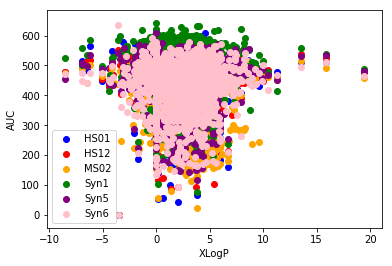

In [112]:
# plot xlogp (14), tpsa (13), complexity (3) against auc 
lines = ['HS01', 'HS12', 'MS02', 'Syn1', 'Syn5', 'Syn6']

plt.scatter(X[:,14], final_auc[:,0], color = 'blue', label = lines[0])
plt.scatter(X[:,14], final_auc[:,1], color = 'red', label = lines[1])
plt.scatter(X[:,14], final_auc[:,2], color = 'orange', label = lines[2])
plt.scatter(X[:,14], final_auc[:,3], color = 'green', label = lines[3])
plt.scatter(X[:,14], final_auc[:,4], color = 'purple', label = lines[4])
plt.scatter(X[:,14], final_auc[:,5], color = 'pink', label = lines[5])
plt.legend()
plt.xlabel('XLogP')
plt.ylabel('AUC')
plt.savefig('static/images/auc_vs_xlogp.png')

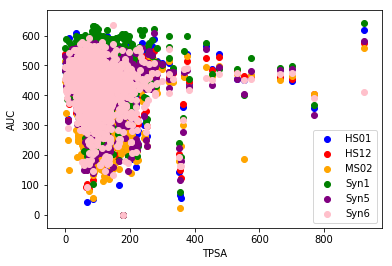

In [113]:

plt.scatter(X[:,13], final_auc[:,0], color = 'blue', label = lines[0])
plt.scatter(X[:,13], final_auc[:,1], color = 'red', label = lines[1])
plt.scatter(X[:,13], final_auc[:,2], color = 'orange', label = lines[2])
plt.scatter(X[:,13], final_auc[:,3], color = 'green', label = lines[3])
plt.scatter(X[:,13], final_auc[:,4], color = 'purple', label = lines[4])
plt.scatter(X[:,13], final_auc[:,5], color = 'pink', label = lines[5])
plt.legend()
plt.xlabel('TPSA')
plt.ylabel('AUC')
plt.savefig('static/images/auc_vs_tpsa.png')

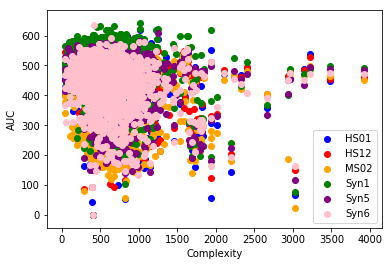

In [114]:

plt.scatter(X[:,3], final_auc[:,0], color = 'blue', label = lines[0])
plt.scatter(X[:,3], final_auc[:,1], color = 'red', label = lines[1])
plt.scatter(X[:,3], final_auc[:,2], color = 'orange', label = lines[2])
plt.scatter(X[:,3], final_auc[:,3], color = 'green', label = lines[3])
plt.scatter(X[:,3], final_auc[:,4], color = 'purple', label = lines[4])
plt.scatter(X[:,3], final_auc[:,5], color = 'pink', label = lines[5])
plt.legend()
plt.xlabel('Complexity')
plt.ylabel('AUC')
plt.savefig('static/images/auc_vs_complexity.png')